<h1>HEART DISEASE PREDICTION SYSTEM</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
heart_df = pd.read_csv('dataset/heart_data.csv')
heart_df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart_df.shape

(1025, 14)

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [195]:
heart_df.notnull().sum()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

<i> # Data is already preprocessed by removing the data with missing and null values </i>

In [ ]:
heart_df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<h2>Exploratory Data Analysis(EDA)</h2>

In [199]:
heart_df.dtypes

age            int64
trestbps       int64
chol           int64
thalach        int64
oldpeak      float64
target         int64
sex_0           bool
sex_1           bool
cp_0            bool
cp_1            bool
cp_2            bool
cp_3            bool
fbs_0           bool
fbs_1           bool
restecg_0       bool
restecg_1       bool
restecg_2       bool
exang_0         bool
exang_1         bool
slope_0         bool
slope_1         bool
slope_2         bool
ca_0            bool
ca_1            bool
ca_2            bool
ca_3            bool
ca_4            bool
thal_0          bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

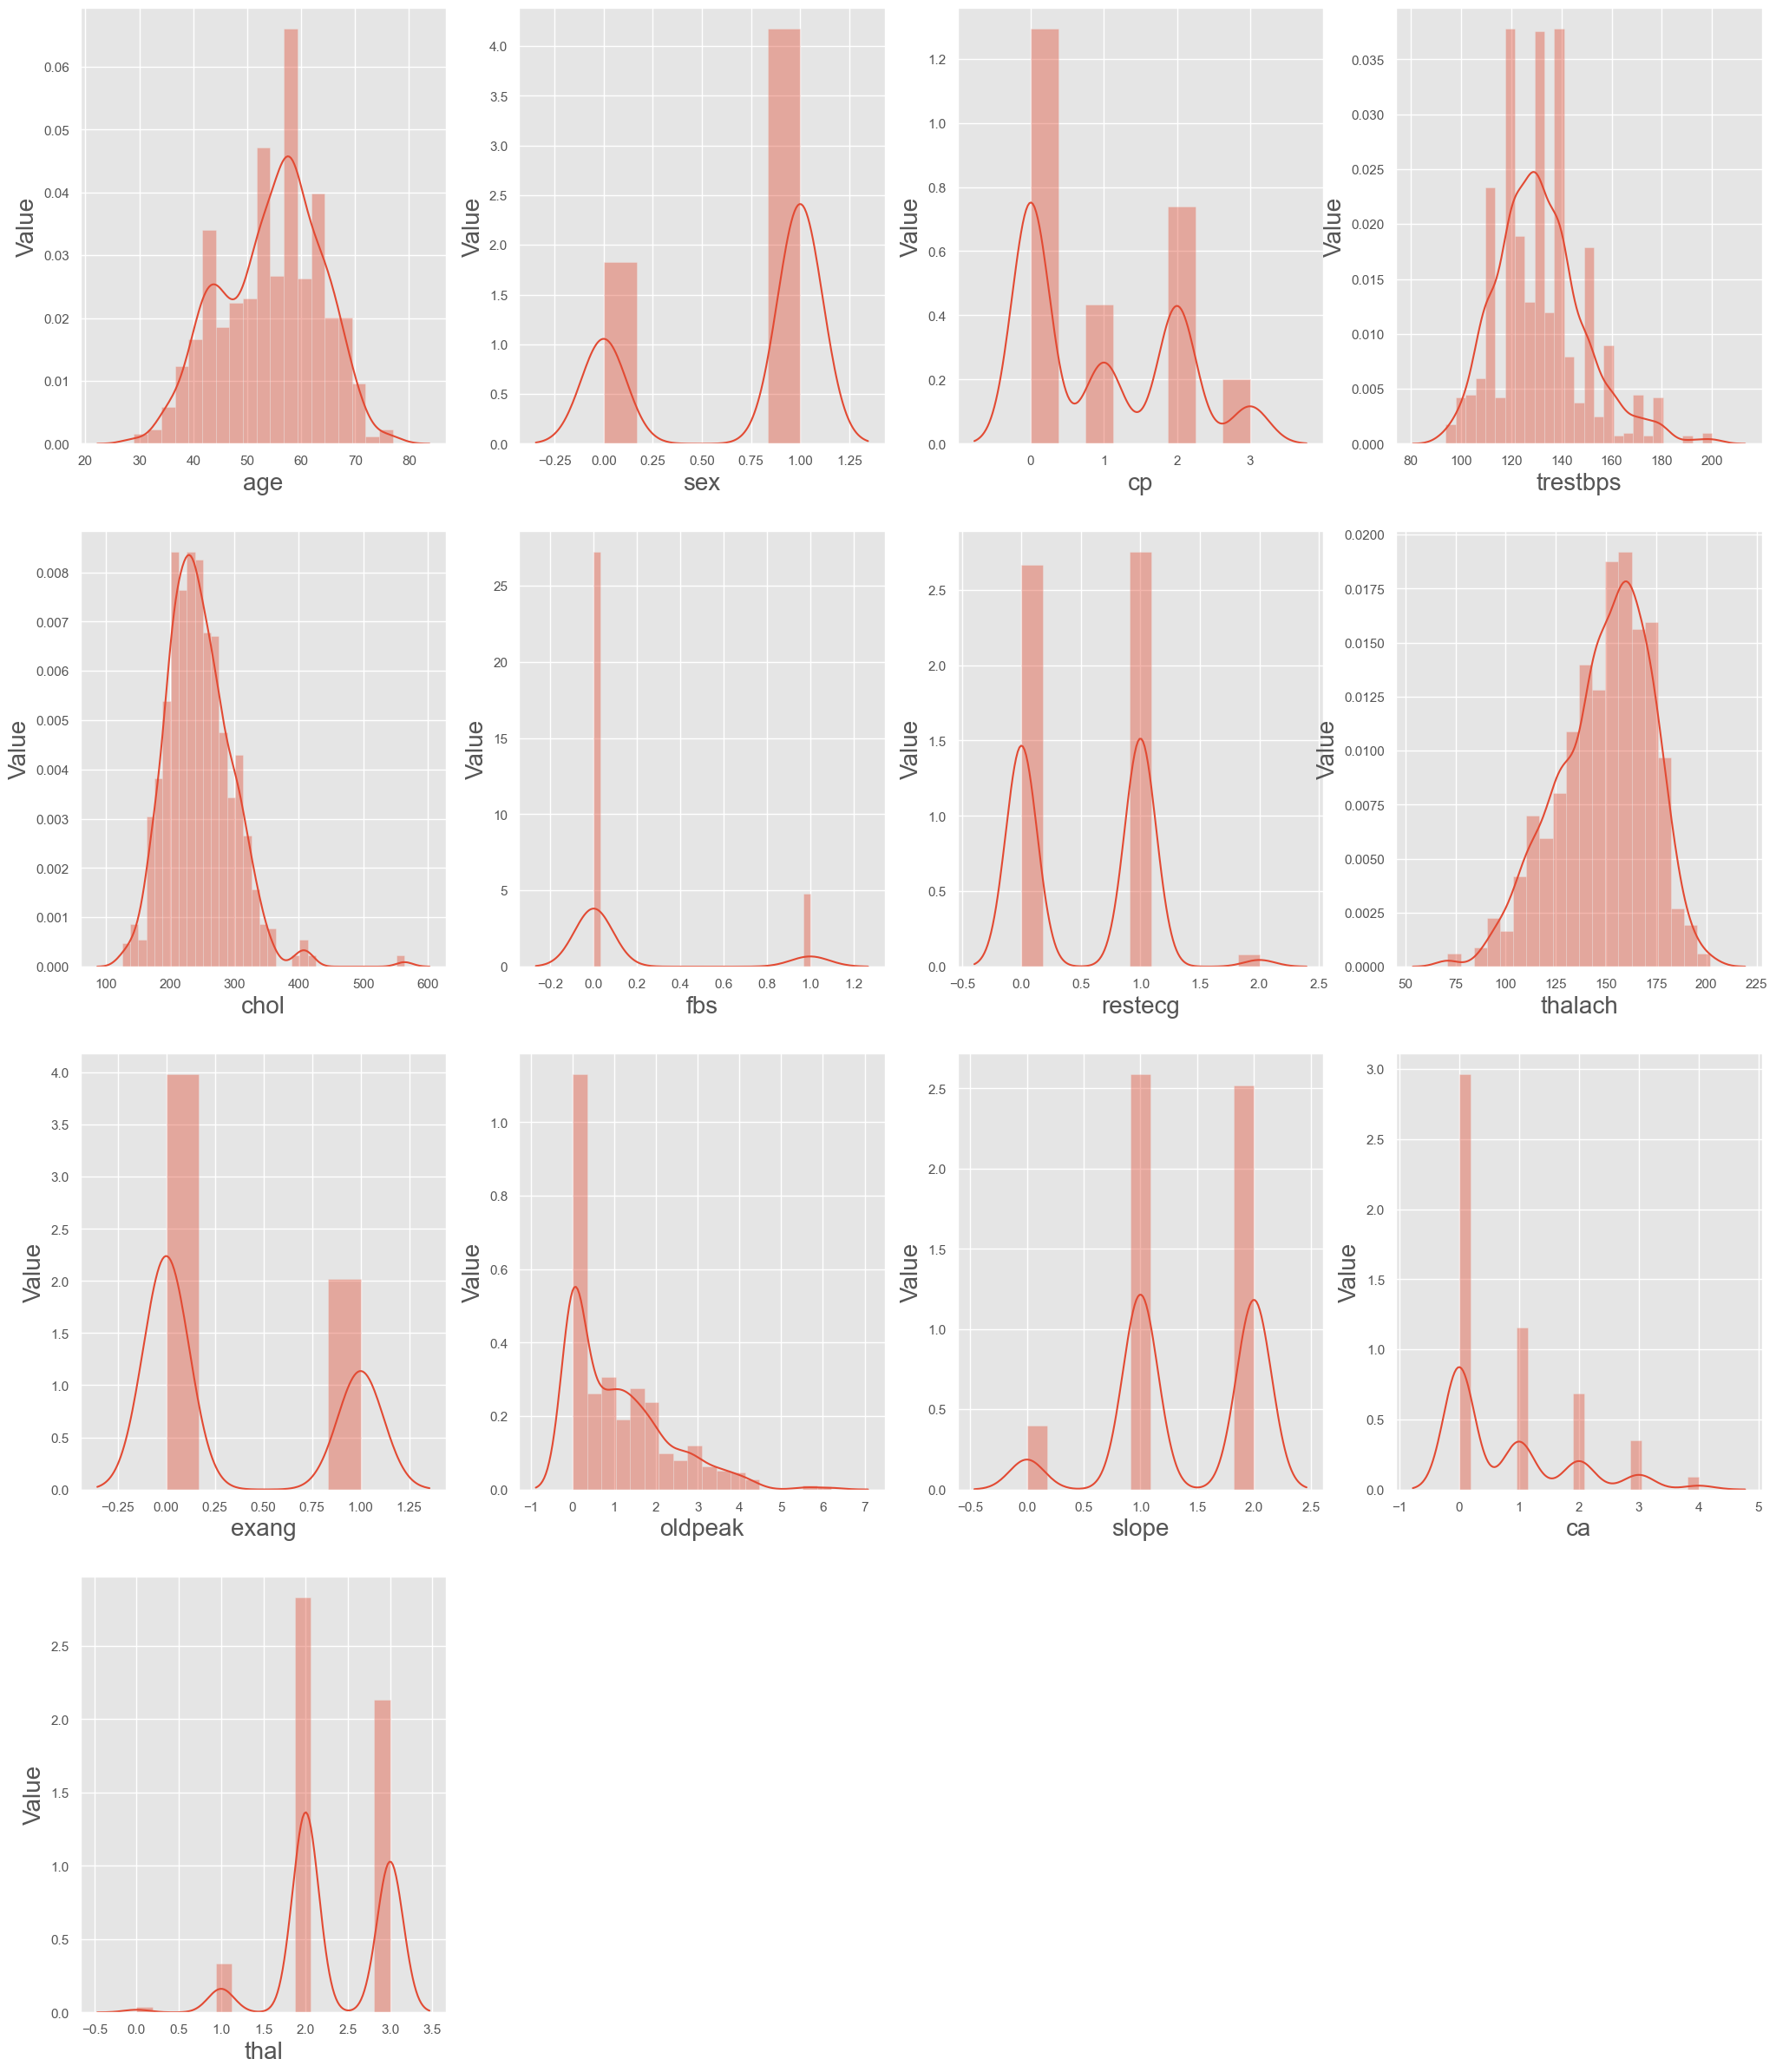

In [7]:
#Distribution plots
plt.figure(figsize=(25,30))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Value',fontsize=20)
    plotnumber+=1
plt.show()

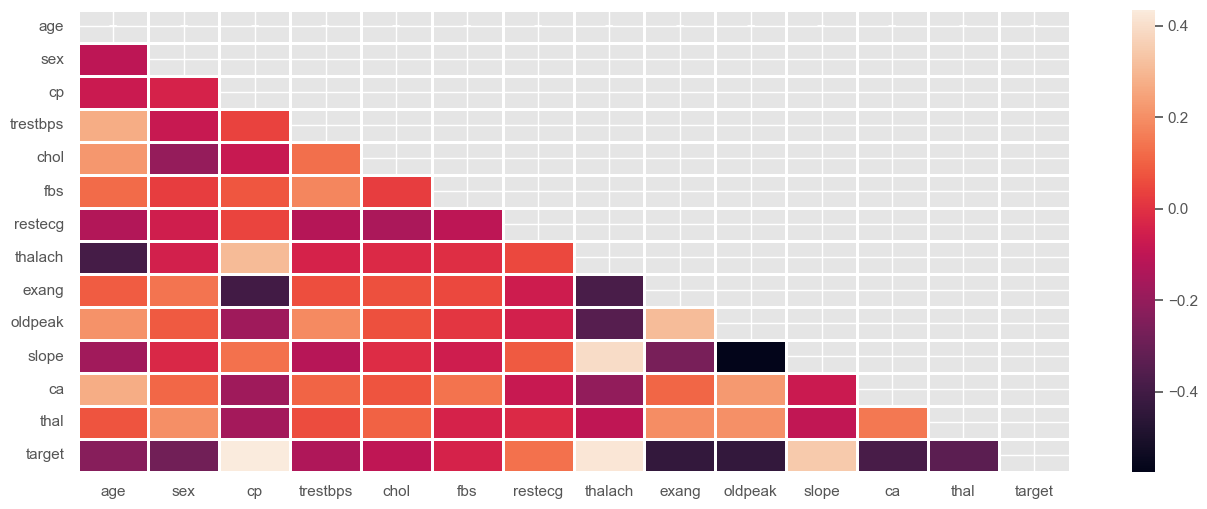

In [8]:
#Correlation matrix
plt.figure(figsize = (16, 6))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [9]:
heart_df.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

<h2>Normalization of Data</h2>

In [10]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016843
chol        0.041430
thalach     0.027516
dtype: float64

In [11]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [13]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 104.2 KB


<h2>Model Implementation</h2>

<h3>1. Support Vector Machine (SVM)</h3>

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

accuracies = {}
svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc1 = accuracy_score(y_test,y_pred)
accuracies['SVM'] = acc1*100

training_accuracy = accuracy_score(y_train, svc.predict(x_train)) * 100
testing_accuracy = accuracy_score(y_test, y_pred) * 100

print("Training accuracy of SVM :", training_accuracy, "%")
print("Testing accuracy of SVM :", testing_accuracy, "%")


Training accuracy of SVM : 71.40864714086472 %
Testing accuracy of SVM : 71.75324675324676 %


In [30]:
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))

print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix : 
 [[108  37]
 [ 50 113]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       145
           1       0.75      0.69      0.72       163

    accuracy                           0.72       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.72      0.72      0.72       308



<h3>2. Logistic Regression </h3>

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, penalty='l2')
lr.fit(x_train,y_train)

y_pred2 = lr.predict(x_test)
acc2 = accuracy_score(y_test,y_pred2)
accuracies['LR'] = acc2*100

training_accuracy = accuracy_score(y_train, lr.predict(x_train)) * 100
testing_accuracy = accuracy_score(y_test, y_pred2) * 100

print("Training accuracy of LR :", training_accuracy, "%")
print("Testing accuracy of LR :", testing_accuracy, "%")

Training accuracy of LR : 85.35564853556485 %
Testing accuracy of LR : 87.66233766233766 %


In [32]:
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred2))

print("Classification Report: \n",classification_report(y_test,y_pred2))

Confusion matrix : 
 [[119  26]
 [ 12 151]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       145
           1       0.85      0.93      0.89       163

    accuracy                           0.88       308
   macro avg       0.88      0.87      0.88       308
weighted avg       0.88      0.88      0.88       308



<h3>3. Random Forest Classifier</h3>

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred3 = rfc.predict(x_test)
acc3 = accuracy_score(y_test,y_pred3)
accuracies['RF'] = acc3*100

training_accuracy = accuracy_score(y_train, rfc.predict(x_train)) * 100
testing_accuracy = accuracy_score(y_test, y_pred3) * 100

print("Training accuracy of RF :", training_accuracy, "%")
print("Testing accuracy of RF :", testing_accuracy, "%")

Training accuracy of RF : 99.442119944212 %
Testing accuracy of RF : 98.7012987012987 %


In [23]:
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred3))

print("Classification Report: \n",classification_report(y_test,y_pred3))

Confusion matrix : 
 [[141   4]
 [  0 163]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       145
           1       0.98      1.00      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



<h2> Comparison of Models </h2>

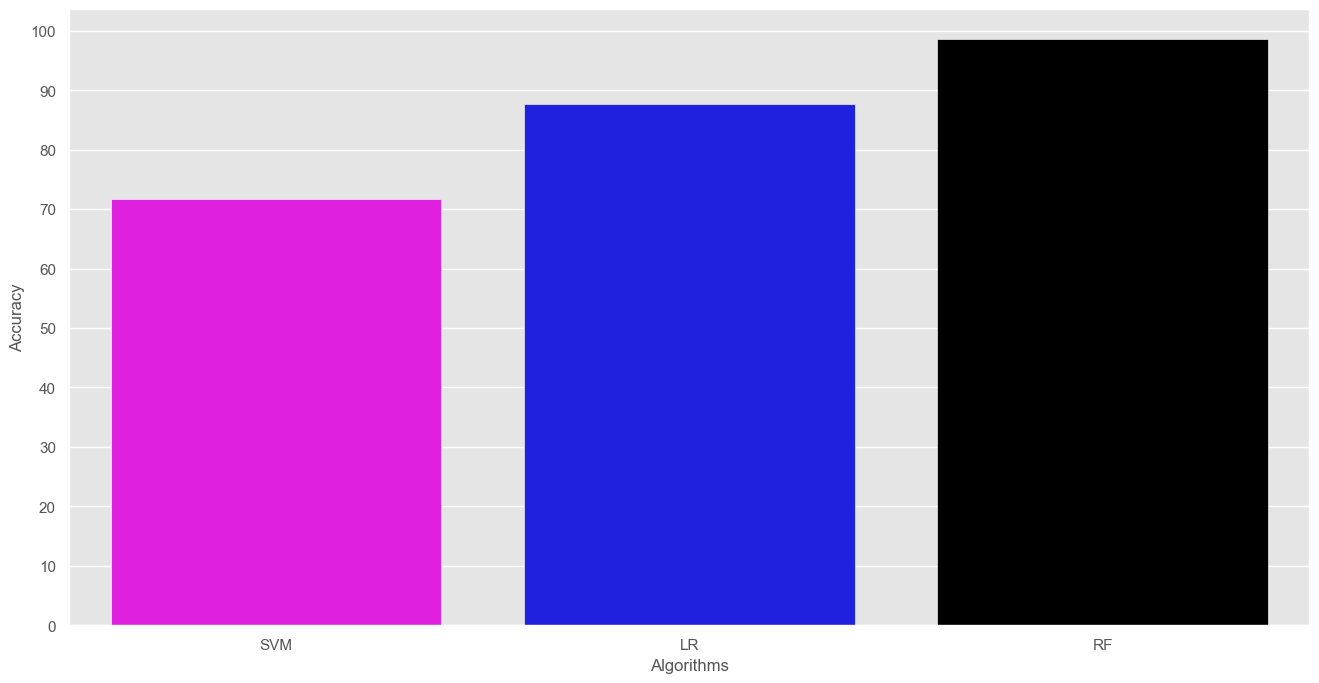

In [24]:
colors = ["magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [33]:
models = pd.DataFrame({
    'Model': ['SVM','Logistic Regression','Random Forest'],
    'Score': [acc1, acc2, acc3]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.987013
1,Logistic Regression,0.876623
0,SVM,0.717532


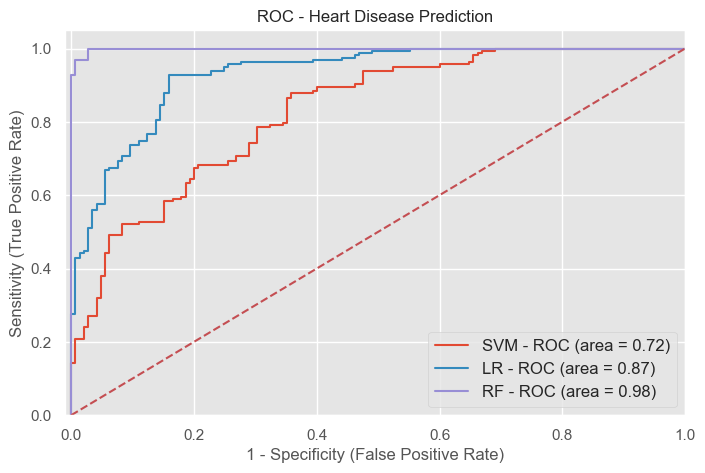

In [34]:
from sklearn import metrics

plt.figure(figsize=(8,5))
models = [
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'RF',
    'model': rfc,
}
]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("outputs/roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[71.75, 87.66000000000001, 98.38]
[71.89999999999999, 87.35000000000001, 98.31]


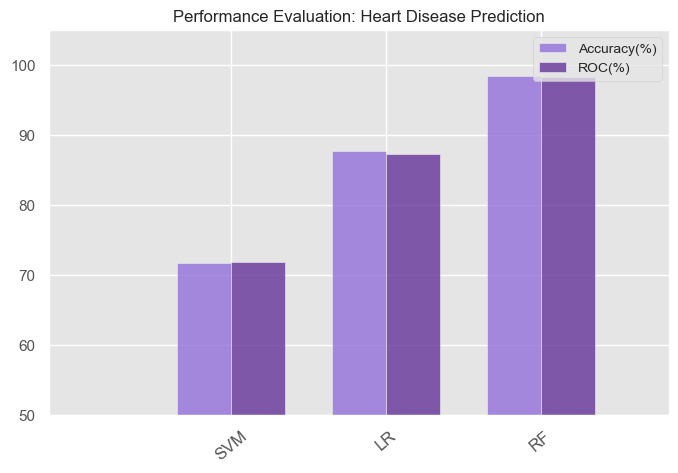

In [35]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = [
    {
        'label': 'SVM',
        'model': svc,
    },
    {
        'label': 'LR',
        'model': lr,
    },
    {
        'label': 'RF',
        'model': rfc,
    }
]

means_roc = []
means_accuracy = []

for m in models:
    model = m['model']
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, model.predict(x_test))
    auc = 100 * round(auc, 4)
    means_roc.append(auc)

    # Calculate accuracy and append to means_accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy = 100 * round(accuracy, 4)
    means_accuracy.append(accuracy)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = len(models)
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='Accuracy(%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                 alpha=opacity,
                 color='rebeccapurple',
                 label='ROC(%)')

plt.xlim([-1, n_groups])
plt.ylim([50, 105])

plt.title('Performance Evaluation: Heart Disease Prediction', fontsize=12)
plt.xticks(index + bar_width / 2, [m['label'] for m in models], rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("outputs/PE_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


<p> The best model according to the accuracies is Random Forest Classfier !</p>

In [36]:
import pickle
best_model = rfc
pickle.dump(best_model, open("models/heart.pkl",'wb'))